In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="white", color_codes=True, font_scale=2)
sns.set_palette("Set2")
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import FormatStrFormatter
rc('text', usetex=True)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [33]:
df = pd.read_csv("lr.csv")

In [34]:
df

,Unnamed: 0,method,lr,seed,step,type,ll,acc
0,0,rsvgd,1.00,128038,10,valid,NaN,0.735204
1,1,rsvgd,1.00,128038,10,test,NaN,0.735764
2,2,rsvgd,1.00,128038,20,valid,-0.609191,0.747789
3,3,rsvgd,1.00,128038,20,test,-0.605617,0.746917
4,4,rsvgd,1.00,128038,30,valid,-0.575387,0.751683
...,...,...,...,...,...,...,...,...
65395,65395,matrix_svgd_avg,0.01,491264,3250,test,-0.518507,0.754077
65396,65396,matrix_svgd_avg,0.01,491264,3260,valid,-0.519332,0.753555
65397,65397,matrix_svgd_avg,0.01,491264,3260,test,-0.518489,0.754172
65398,65398,matrix_svgd_avg,0.01,491264,3270,valid,-0.519300,0.753254


In [35]:
df.loc[df["method"] == "svgd", "method"] = "SVGD"
df.loc[df["method"] == "svmd", "method"] = "SVNG"
df.loc[df["method"] == "rsvgd", "method"] = "RSVGD"
df.loc[df["method"] == "matrix_svgd_avg", "method"] = "Matrix SVGD (Avg)"

In [36]:
methods = list(set(df["method"].tolist()))
methods

['SVGD', 'RSVGD', 'Matrix SVGD (Avg)', 'SVNG']

In [37]:
is_nan = df.isnull()
row_has_nan = is_nan.any(axis=1)
rows_with_nan = df[row_has_nan]
pd.unique(rows_with_nan[["method", "lr"]].values.ravel('K'))

array(['RSVGD', 1.0, 0.5], dtype=object)

In [38]:
svgddf = df[(df["method"] == "SVGD") & (df["lr"] == 1.)]
# svgddf[svgddf["step"] == 3270]
svgddf[svgddf["seed"] == 791625]

,Unnamed: 0,method,lr,seed,step,type,ll,acc
39894,39894,SVGD,1.0,791625,10,valid,-0.664723,0.632968
39895,39895,SVGD,1.0,791625,10,test,-0.665082,0.632540
39896,39896,SVGD,1.0,791625,20,valid,-0.648134,0.667305
39897,39897,SVGD,1.0,791625,20,test,-0.649120,0.664294
39898,39898,SVGD,1.0,791625,30,valid,-0.631662,0.662529
...,...,...,...,...,...,...,...,...
40543,40543,SVGD,1.0,791625,3250,test,-0.517395,0.753956
40544,40544,SVGD,1.0,791625,3260,valid,-0.517708,0.756911
40545,40545,SVGD,1.0,791625,3260,test,-0.517980,0.754826
40546,40546,SVGD,1.0,791625,3270,valid,-0.592310,0.679912


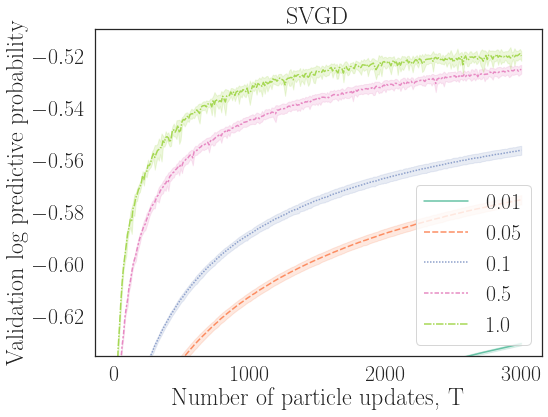

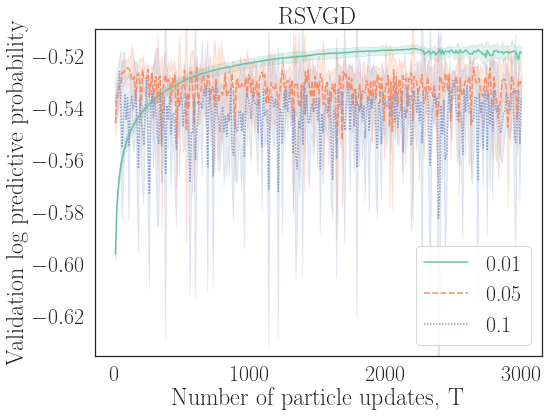

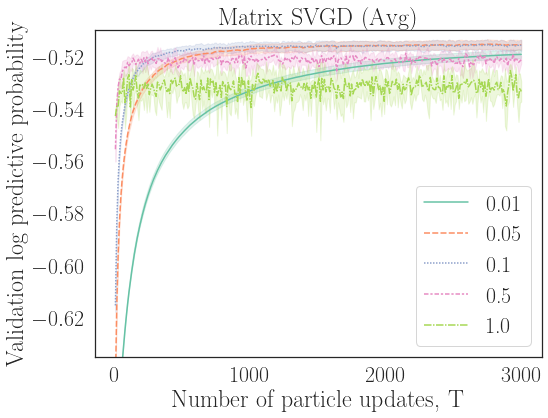

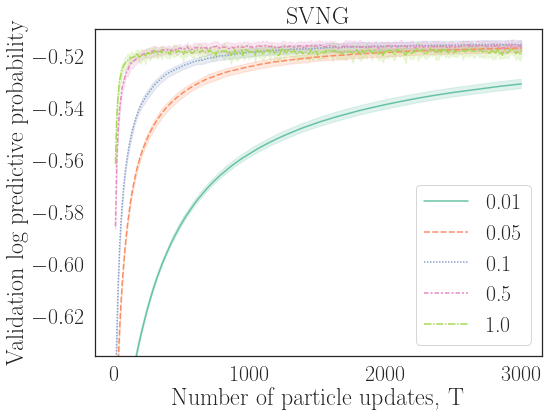

In [39]:
name_map = {
    "SVGD": "svgd",
    "SVNG": "svmd",
    "RSVGD": "rsvgd",
    "Matrix SVGD (Avg)": "matsvgd",
}

for method in methods:
    subdf = df[(df["method"] == method) & (df["type"] == "valid")]
    subdf = subdf[subdf["step"] <= 3000]
    if method == "RSVGD":
        subdf = subdf[~subdf["lr"].isin([1., 0.5])]
    plt.figure(figsize=(8, 6))
    g = sns.lineplot(data=subdf, x="step", y="ll", style="lr", hue="lr", ci="sd", palette=sns.color_palette("Set2", len(pd.unique(subdf["lr"]))))
    g.legend_.set_title(None)
    plt.title(method)
    plt.ylabel("Validation log predictive probability")
    plt.xlabel("Number of particle updates, T")
    plt.ylim(ymin=-0.635, ymax=-0.51)
    plt.savefig("lr_{}.pdf".format(name_map[method]), bbox_inches="tight", dpi=150)

In [40]:
testdf = df[df["type"] == "test"]
# report the learning rate that achieves best log test likelihood
lr_map = {
    "SVGD": 1.,
    "Matrix SVGD (Avg)": 0.1,
    "RSVGD": 0.01,
    "SVNG": 0.5
}
selection = False
for method, lr in lr_map.items():
    selection = selection | ((testdf["method"] == method) & (testdf["lr"] == lr))
plotdf = testdf[selection]

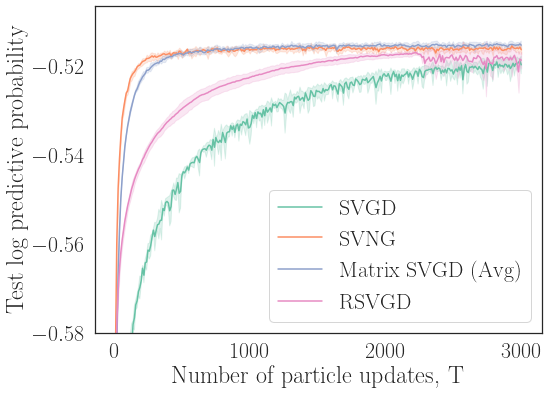

In [41]:
plt.figure(figsize=(8, 6))
plotdf = plotdf[plotdf["method"] != "Matrix SVGD"]
g = sns.lineplot(data=plotdf[plotdf["step"] <= 3000], x="step", y="ll", ci="sd", hue="method")
g.legend_.set_title(None)
plt.ylim(ymin=-0.58)
plt.ylabel("Test log predictive probability")
plt.xlabel("Number of particle updates, T")
plt.savefig("lr_ll.pdf", bbox_inches="tight", dpi=150)

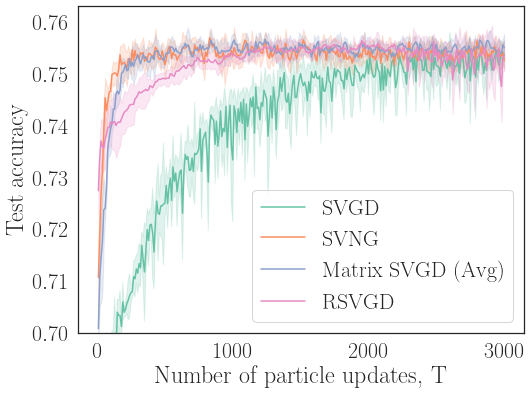

In [42]:
plt.figure(figsize=(8, 6))
g = sns.lineplot(data=plotdf[plotdf["step"] <= 3000], x="step", y="acc", ci="sd", hue="method")
g.legend_.set_title(None)
plt.ylim(ymin=0.7, ymax=0.763)
plt.ylabel("Test accuracy")
plt.xlabel("Number of particle updates, T")
plt.savefig("lr_acc.pdf", bbox_inches="tight", dpi=150)

In [43]:
# plt.figure(figsize=(8, 6))
# sns.lineplot(data=df.loc[df["type"] == "test"], x="step", y="ll", hue="method")